# HW1: Neural Networks
Welcome to HomeWork 1  &#128522;&#9996;<br>
It's time to build your first neural network, which will have a hidden layer. 

**In this homework, you will learn how to:**
- Implement a 2-class classification neural network with a single hidden layer
- Use units with a non-linear activation function, such as tanh 
- Compute the cross entropy loss 
- Implement forward and backward propagation
- Update weights using gradient descent
- ...

We will start by loading the packages:

In [114]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Then, we load the dataset:

In [115]:
def load_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

You have: <br>- a numpy-array (matrix) X that contains your features (x1, x2) <br> - a numpy-array (vector) Y that contains your labels (red:0, blue:1)

In [116]:
X, Y = load_dataset()

We can visualize the dataset using matplotlib. The data looks like a "flower" with some red (label y=0) and some blue (y=1) points. Your goal is to build a neural network model to classify data into two classes {0, 1}.<br>

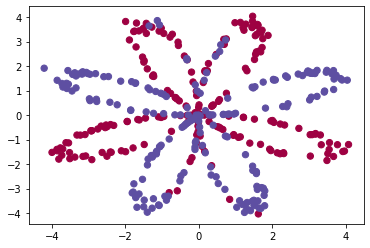

In [117]:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

From now implement your model.
<br>
Please add cells and explain yours developing steps and your results.

<div dir='rtl'style="text-align: right;font-family:verdana;">
برای توضیحات از زبان فارسی استفاده نمایید.
<br>
موفق باشید

</div>

کتابخانه های مورد نیاز را وارد می کنیم.

In [118]:
from random import seed
from random import random
from random import seed
from random import randrange
from random import random
from csv import reader
from math import exp

در اینجا ما شبکه را ایجاد خواهیم کرد. وزن ها را به صورت تصادفی می دهیم.

In [119]:
def init(inputs, hiddens, outputs):
    network = list()
    hidden_layer = [{'weights':[random() for i in range(inputs + 1)]} for i in range(hiddens)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(hiddens + 1)]} for i in range(outputs)]
    network.append(output_layer)
    return network

یک شبکه با دو ورودی، یک لایه پنهان و 2 خروجی ایجاد میکنیم و وزن های تصادفی آن را نمایش می دهیم.

In [120]:
network = init(2, 1, 2)
for layer in network:
    print(layer)

[{'weights': [0.40028134980689967, 0.10479749325949772, 0.7186299259247355]}]
[{'weights': [0.9940616456920436, 0.5227291189878979]}, {'weights': [0.6519646233537052, 0.6670571437524747]}]


ورودی نورون را در این تابع محاسبه میکنیم که همان Z می باشد.

In [121]:
def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
    return activation

تابع فعال ساز، در این جا دو تابع sigmoid و tanh وجود دارند.

In [122]:
def sigmoid(z):
    return 1.0 / (1.0 + exp(-z))

In [123]:
def tanh(z):
    return (exp(x) - exp(-x)) / (exp(x) + exp(-x))

مشتق sigmoid

In [124]:
def sigmoid_derivative(output):
    """ output is sigmoid result """
    return output * (1.0 - output)

مشتق tanh

In [125]:
def tanh_derivative(output):
    """ output is tanh result """
    return 1 - output ** 2

فرآیند Forward Propagation

In [126]:
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = sigmoid(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

محاسبه خطا و اعمال در نورون ها

In [127]:
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * sigmoid_derivative(neuron['output'])

به روز رسانی خطاها

In [128]:
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']

آموزش شبکه داده شده روی داده های داده شده با نرخ یادگیری داده شده و تعداد epoch مد نظر و تعداد خروجی مورد نظر

In [129]:
def train_network(network, train, l_rate, n_epoch, n_outputs):
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[int(row[-1])] = 1
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
        print('epoch=%d, learning rate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))

میتوانیم داده هایمان را به چند قسمت تقسیم کنیم و روی آنها آزمایش و تست کنیم و دقت عملکرمان را بسنجیم

In [130]:
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

یک تابع ساده برای محاسبه دقت به درصد

In [131]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

سنجش کارایی شبکه - در اینجا با دادن دیتاست و الگوریتمی که اجرا کند (اشاره به تابع) تعداد تقسیم داده ها به تست و آموزش، و پارامترهای نرخ یادگیری، تعداد epoch و همچنین لایه های پنهان 

In [132]:
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores

فرآیند Back Propagation به همراه Stochastic Gradient Descent

In [133]:
def back_propagation(train, test, l_rate, n_epoch, n_hidden):
    n_inputs = len(train[0]) - 1
    n_outputs = len(set([row[-1] for row in train]))
    network = init(n_inputs, n_hidden, n_outputs)
    train_network(network, train, l_rate, n_epoch, n_outputs)
    predictions = list()
    for row in test:
        prediction = predict(network, row)
        predictions.append(prediction)
    return(predictions)

تابع پیش بینی که با دادن داده باید تخمین بزند متعلق به کدام دسته بندی است.

In [134]:
def predict(network, row):
    outputs = forward_propagate(network, row)
    return outputs.index(max(outputs))

تست اول بر روی داده ها
در اینجا داده ها به صورت ستونی تغییر شکل داده اند و تبدیل به لیست شده اند 

In [135]:
dataset = np.hstack((np.reshape(X[0], (400, 1)).astype(float), np.reshape(X[1], (400, 1)).astype(float), Y.T.astype(int))).tolist()
n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = init(n_inputs, 2, n_outputs)
train_network(network, dataset, 0.5, 20, n_outputs)
for layer in network:
    print(layer)

epoch=0, learning rate=0.500, error=58.338
epoch=1, learning rate=0.500, error=89.287
epoch=2, learning rate=0.500, error=86.562
epoch=3, learning rate=0.500, error=84.026
epoch=4, learning rate=0.500, error=87.345
epoch=5, learning rate=0.500, error=92.336
epoch=6, learning rate=0.500, error=97.069
epoch=7, learning rate=0.500, error=101.101
epoch=8, learning rate=0.500, error=104.392
epoch=9, learning rate=0.500, error=107.048
epoch=10, learning rate=0.500, error=109.199
epoch=11, learning rate=0.500, error=110.936
epoch=12, learning rate=0.500, error=112.286
epoch=13, learning rate=0.500, error=113.131
epoch=14, learning rate=0.500, error=113.211
epoch=15, learning rate=0.500, error=112.665
epoch=16, learning rate=0.500, error=112.473
epoch=17, learning rate=0.500, error=109.859
epoch=18, learning rate=0.500, error=109.882
epoch=19, learning rate=0.500, error=110.269
[{'weights': [-5.674446717819382, 5.442530886122317, -1.323193086406672], 'output': 0.9999867248493843, 'delta': -1.7

با تنها فقط 20 epoch پیش بینی های دقیقی نداریم.

In [136]:
for row in dataset:
    prediction = predict(network, row)
    print('Expected=%d, Got=%d' % (row[-1], prediction))

Expected=0, Got=0
Expected=0, Got=1
Expected=0, Got=1
Expected=0, Got=1
Expected=0, Got=0
Expected=0, Got=1
Expected=0, Got=0
Expected=0, Got=1
Expected=0, Got=0
Expected=0, Got=1
Expected=0, Got=0
Expected=0, Got=1
Expected=0, Got=1
Expected=0, Got=1
Expected=0, Got=0
Expected=0, Got=1
Expected=0, Got=0
Expected=0, Got=1
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=1
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=1
Expected=0, Got=1
Expected=0, Got=1
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=1
Expected=0, Got=1
Expected=0, Got=0
Expected=0, Got=1
Expected=0, Got=1
Expected=0, Got=1
Expected=0, Got=1
Expected=0, Got=1
Expected=0, Got=1
Expected=0, Got=1
Expected=0, Got=1
Expected=0, Got=1
Expected=0

در اینجا مشاهده میکنیم اگر تعداد epoch را بالا ببریم از جایی به بعد میزان خطا تغییر معنا داری ندارد و در حدود 36 ثابت میماند

در نهایت مشاهده میکنیم که میتوانیم به دقتی حدود 83 درصد دست پیدا کرد.

In [137]:
n_folds = 3
l_rate = 0.5
n_epoch = 1000
n_hidden = 50
scores = evaluate_algorithm(dataset, back_propagation, n_folds, l_rate, n_epoch, n_hidden)
print('scores: %s' % scores)
print('mean accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

epoch=0, learning rate=0.500, error=265.268
epoch=1, learning rate=0.500, error=264.134
epoch=2, learning rate=0.500, error=257.665
epoch=3, learning rate=0.500, error=213.935
epoch=4, learning rate=0.500, error=201.679
epoch=5, learning rate=0.500, error=189.653
epoch=6, learning rate=0.500, error=156.123
epoch=7, learning rate=0.500, error=96.801
epoch=8, learning rate=0.500, error=80.826
epoch=9, learning rate=0.500, error=74.519
epoch=10, learning rate=0.500, error=70.755
epoch=11, learning rate=0.500, error=67.877
epoch=12, learning rate=0.500, error=65.879
epoch=13, learning rate=0.500, error=64.362
epoch=14, learning rate=0.500, error=63.182
epoch=15, learning rate=0.500, error=62.168
epoch=16, learning rate=0.500, error=61.250
epoch=17, learning rate=0.500, error=60.436
epoch=18, learning rate=0.500, error=59.723
epoch=19, learning rate=0.500, error=59.094
epoch=20, learning rate=0.500, error=58.529
epoch=21, learning rate=0.500, error=58.017
epoch=22, learning rate=0.500, erro

epoch=187, learning rate=0.500, error=41.717
epoch=188, learning rate=0.500, error=41.678
epoch=189, learning rate=0.500, error=41.640
epoch=190, learning rate=0.500, error=41.602
epoch=191, learning rate=0.500, error=41.566
epoch=192, learning rate=0.500, error=41.530
epoch=193, learning rate=0.500, error=41.494
epoch=194, learning rate=0.500, error=41.460
epoch=195, learning rate=0.500, error=41.425
epoch=196, learning rate=0.500, error=41.391
epoch=197, learning rate=0.500, error=41.357
epoch=198, learning rate=0.500, error=41.323
epoch=199, learning rate=0.500, error=41.288
epoch=200, learning rate=0.500, error=41.253
epoch=201, learning rate=0.500, error=41.217
epoch=202, learning rate=0.500, error=41.179
epoch=203, learning rate=0.500, error=41.139
epoch=204, learning rate=0.500, error=41.098
epoch=205, learning rate=0.500, error=41.053
epoch=206, learning rate=0.500, error=41.005
epoch=207, learning rate=0.500, error=40.953
epoch=208, learning rate=0.500, error=40.898
epoch=209,

epoch=370, learning rate=0.500, error=37.369
epoch=371, learning rate=0.500, error=37.360
epoch=372, learning rate=0.500, error=37.351
epoch=373, learning rate=0.500, error=37.343
epoch=374, learning rate=0.500, error=37.335
epoch=375, learning rate=0.500, error=37.327
epoch=376, learning rate=0.500, error=37.320
epoch=377, learning rate=0.500, error=37.313
epoch=378, learning rate=0.500, error=37.307
epoch=379, learning rate=0.500, error=37.302
epoch=380, learning rate=0.500, error=37.297
epoch=381, learning rate=0.500, error=37.293
epoch=382, learning rate=0.500, error=37.290
epoch=383, learning rate=0.500, error=37.287
epoch=384, learning rate=0.500, error=37.286
epoch=385, learning rate=0.500, error=37.286
epoch=386, learning rate=0.500, error=37.287
epoch=387, learning rate=0.500, error=37.289
epoch=388, learning rate=0.500, error=37.294
epoch=389, learning rate=0.500, error=37.300
epoch=390, learning rate=0.500, error=37.308
epoch=391, learning rate=0.500, error=37.319
epoch=392,

epoch=553, learning rate=0.500, error=37.109
epoch=554, learning rate=0.500, error=37.101
epoch=555, learning rate=0.500, error=37.092
epoch=556, learning rate=0.500, error=37.084
epoch=557, learning rate=0.500, error=37.076
epoch=558, learning rate=0.500, error=37.067
epoch=559, learning rate=0.500, error=37.059
epoch=560, learning rate=0.500, error=37.050
epoch=561, learning rate=0.500, error=37.042
epoch=562, learning rate=0.500, error=37.033
epoch=563, learning rate=0.500, error=37.025
epoch=564, learning rate=0.500, error=37.016
epoch=565, learning rate=0.500, error=37.008
epoch=566, learning rate=0.500, error=36.999
epoch=567, learning rate=0.500, error=36.991
epoch=568, learning rate=0.500, error=36.982
epoch=569, learning rate=0.500, error=36.974
epoch=570, learning rate=0.500, error=36.965
epoch=571, learning rate=0.500, error=36.957
epoch=572, learning rate=0.500, error=36.948
epoch=573, learning rate=0.500, error=36.940
epoch=574, learning rate=0.500, error=36.931
epoch=575,

epoch=738, learning rate=0.500, error=35.662
epoch=739, learning rate=0.500, error=35.656
epoch=740, learning rate=0.500, error=35.650
epoch=741, learning rate=0.500, error=35.644
epoch=742, learning rate=0.500, error=35.637
epoch=743, learning rate=0.500, error=35.631
epoch=744, learning rate=0.500, error=35.625
epoch=745, learning rate=0.500, error=35.619
epoch=746, learning rate=0.500, error=35.613
epoch=747, learning rate=0.500, error=35.607
epoch=748, learning rate=0.500, error=35.600
epoch=749, learning rate=0.500, error=35.594
epoch=750, learning rate=0.500, error=35.588
epoch=751, learning rate=0.500, error=35.582
epoch=752, learning rate=0.500, error=35.576
epoch=753, learning rate=0.500, error=35.570
epoch=754, learning rate=0.500, error=35.564
epoch=755, learning rate=0.500, error=35.558
epoch=756, learning rate=0.500, error=35.552
epoch=757, learning rate=0.500, error=35.546
epoch=758, learning rate=0.500, error=35.541
epoch=759, learning rate=0.500, error=35.535
epoch=760,

epoch=921, learning rate=0.500, error=34.874
epoch=922, learning rate=0.500, error=34.871
epoch=923, learning rate=0.500, error=34.868
epoch=924, learning rate=0.500, error=34.865
epoch=925, learning rate=0.500, error=34.863
epoch=926, learning rate=0.500, error=34.860
epoch=927, learning rate=0.500, error=34.857
epoch=928, learning rate=0.500, error=34.854
epoch=929, learning rate=0.500, error=34.851
epoch=930, learning rate=0.500, error=34.848
epoch=931, learning rate=0.500, error=34.845
epoch=932, learning rate=0.500, error=34.843
epoch=933, learning rate=0.500, error=34.840
epoch=934, learning rate=0.500, error=34.837
epoch=935, learning rate=0.500, error=34.834
epoch=936, learning rate=0.500, error=34.831
epoch=937, learning rate=0.500, error=34.828
epoch=938, learning rate=0.500, error=34.825
epoch=939, learning rate=0.500, error=34.823
epoch=940, learning rate=0.500, error=34.820
epoch=941, learning rate=0.500, error=34.817
epoch=942, learning rate=0.500, error=34.814
epoch=943,

epoch=107, learning rate=0.500, error=53.124
epoch=108, learning rate=0.500, error=52.998
epoch=109, learning rate=0.500, error=52.872
epoch=110, learning rate=0.500, error=52.749
epoch=111, learning rate=0.500, error=52.626
epoch=112, learning rate=0.500, error=52.504
epoch=113, learning rate=0.500, error=52.384
epoch=114, learning rate=0.500, error=52.265
epoch=115, learning rate=0.500, error=52.147
epoch=116, learning rate=0.500, error=52.030
epoch=117, learning rate=0.500, error=51.914
epoch=118, learning rate=0.500, error=51.800
epoch=119, learning rate=0.500, error=51.686
epoch=120, learning rate=0.500, error=51.574
epoch=121, learning rate=0.500, error=51.463
epoch=122, learning rate=0.500, error=51.354
epoch=123, learning rate=0.500, error=51.245
epoch=124, learning rate=0.500, error=51.138
epoch=125, learning rate=0.500, error=51.032
epoch=126, learning rate=0.500, error=50.928
epoch=127, learning rate=0.500, error=50.826
epoch=128, learning rate=0.500, error=50.724
epoch=129,

epoch=290, learning rate=0.500, error=45.230
epoch=291, learning rate=0.500, error=45.191
epoch=292, learning rate=0.500, error=45.152
epoch=293, learning rate=0.500, error=45.112
epoch=294, learning rate=0.500, error=45.071
epoch=295, learning rate=0.500, error=45.030
epoch=296, learning rate=0.500, error=44.987
epoch=297, learning rate=0.500, error=44.944
epoch=298, learning rate=0.500, error=44.899
epoch=299, learning rate=0.500, error=44.854
epoch=300, learning rate=0.500, error=44.807
epoch=301, learning rate=0.500, error=44.760
epoch=302, learning rate=0.500, error=44.713
epoch=303, learning rate=0.500, error=44.664
epoch=304, learning rate=0.500, error=44.616
epoch=305, learning rate=0.500, error=44.568
epoch=306, learning rate=0.500, error=44.521
epoch=307, learning rate=0.500, error=44.476
epoch=308, learning rate=0.500, error=44.433
epoch=309, learning rate=0.500, error=44.394
epoch=310, learning rate=0.500, error=44.360
epoch=311, learning rate=0.500, error=44.332
epoch=312,

epoch=473, learning rate=0.500, error=37.387
epoch=474, learning rate=0.500, error=37.155
epoch=475, learning rate=0.500, error=36.963
epoch=476, learning rate=0.500, error=36.793
epoch=477, learning rate=0.500, error=36.647
epoch=478, learning rate=0.500, error=36.523
epoch=479, learning rate=0.500, error=36.419
epoch=480, learning rate=0.500, error=36.333
epoch=481, learning rate=0.500, error=36.260
epoch=482, learning rate=0.500, error=36.198
epoch=483, learning rate=0.500, error=36.145
epoch=484, learning rate=0.500, error=36.099
epoch=485, learning rate=0.500, error=36.058
epoch=486, learning rate=0.500, error=36.021
epoch=487, learning rate=0.500, error=35.989
epoch=488, learning rate=0.500, error=35.959
epoch=489, learning rate=0.500, error=35.932
epoch=490, learning rate=0.500, error=35.906
epoch=491, learning rate=0.500, error=35.883
epoch=492, learning rate=0.500, error=35.861
epoch=493, learning rate=0.500, error=35.839
epoch=494, learning rate=0.500, error=35.819
epoch=495,

epoch=656, learning rate=0.500, error=37.346
epoch=657, learning rate=0.500, error=36.886
epoch=658, learning rate=0.500, error=36.644
epoch=659, learning rate=0.500, error=36.639
epoch=660, learning rate=0.500, error=37.362
epoch=661, learning rate=0.500, error=36.882
epoch=662, learning rate=0.500, error=36.856
epoch=663, learning rate=0.500, error=36.509
epoch=664, learning rate=0.500, error=37.980
epoch=665, learning rate=0.500, error=38.008
epoch=666, learning rate=0.500, error=37.052
epoch=667, learning rate=0.500, error=36.654
epoch=668, learning rate=0.500, error=37.144
epoch=669, learning rate=0.500, error=36.796
epoch=670, learning rate=0.500, error=36.590
epoch=671, learning rate=0.500, error=36.582
epoch=672, learning rate=0.500, error=37.259
epoch=673, learning rate=0.500, error=36.813
epoch=674, learning rate=0.500, error=36.809
epoch=675, learning rate=0.500, error=36.471
epoch=676, learning rate=0.500, error=37.957
epoch=677, learning rate=0.500, error=37.931
epoch=678,

epoch=839, learning rate=0.500, error=36.064
epoch=840, learning rate=0.500, error=36.293
epoch=841, learning rate=0.500, error=36.448
epoch=842, learning rate=0.500, error=37.245
epoch=843, learning rate=0.500, error=36.725
epoch=844, learning rate=0.500, error=37.423
epoch=845, learning rate=0.500, error=35.958
epoch=846, learning rate=0.500, error=35.666
epoch=847, learning rate=0.500, error=35.461
epoch=848, learning rate=0.500, error=35.454
epoch=849, learning rate=0.500, error=35.551
epoch=850, learning rate=0.500, error=35.504
epoch=851, learning rate=0.500, error=35.488
epoch=852, learning rate=0.500, error=35.489
epoch=853, learning rate=0.500, error=35.494
epoch=854, learning rate=0.500, error=35.495
epoch=855, learning rate=0.500, error=35.495
epoch=856, learning rate=0.500, error=35.495
epoch=857, learning rate=0.500, error=35.495
epoch=858, learning rate=0.500, error=35.496
epoch=859, learning rate=0.500, error=35.497
epoch=860, learning rate=0.500, error=35.498
epoch=861,

epoch=22, learning rate=0.500, error=66.613
epoch=23, learning rate=0.500, error=66.015
epoch=24, learning rate=0.500, error=65.389
epoch=25, learning rate=0.500, error=64.752
epoch=26, learning rate=0.500, error=64.118
epoch=27, learning rate=0.500, error=63.498
epoch=28, learning rate=0.500, error=62.895
epoch=29, learning rate=0.500, error=62.314
epoch=30, learning rate=0.500, error=61.760
epoch=31, learning rate=0.500, error=61.238
epoch=32, learning rate=0.500, error=60.753
epoch=33, learning rate=0.500, error=60.302
epoch=34, learning rate=0.500, error=59.883
epoch=35, learning rate=0.500, error=59.490
epoch=36, learning rate=0.500, error=59.120
epoch=37, learning rate=0.500, error=58.771
epoch=38, learning rate=0.500, error=58.442
epoch=39, learning rate=0.500, error=58.135
epoch=40, learning rate=0.500, error=57.852
epoch=41, learning rate=0.500, error=57.597
epoch=42, learning rate=0.500, error=57.371
epoch=43, learning rate=0.500, error=57.172
epoch=44, learning rate=0.500, e

epoch=207, learning rate=0.500, error=43.613
epoch=208, learning rate=0.500, error=43.602
epoch=209, learning rate=0.500, error=43.591
epoch=210, learning rate=0.500, error=43.580
epoch=211, learning rate=0.500, error=43.569
epoch=212, learning rate=0.500, error=43.559
epoch=213, learning rate=0.500, error=43.548
epoch=214, learning rate=0.500, error=43.537
epoch=215, learning rate=0.500, error=43.526
epoch=216, learning rate=0.500, error=43.515
epoch=217, learning rate=0.500, error=43.504
epoch=218, learning rate=0.500, error=43.493
epoch=219, learning rate=0.500, error=43.482
epoch=220, learning rate=0.500, error=43.470
epoch=221, learning rate=0.500, error=43.458
epoch=222, learning rate=0.500, error=43.446
epoch=223, learning rate=0.500, error=43.434
epoch=224, learning rate=0.500, error=43.421
epoch=225, learning rate=0.500, error=43.409
epoch=226, learning rate=0.500, error=43.395
epoch=227, learning rate=0.500, error=43.382
epoch=228, learning rate=0.500, error=43.368
epoch=229,

epoch=390, learning rate=0.500, error=39.178
epoch=391, learning rate=0.500, error=39.154
epoch=392, learning rate=0.500, error=39.130
epoch=393, learning rate=0.500, error=39.107
epoch=394, learning rate=0.500, error=39.084
epoch=395, learning rate=0.500, error=39.062
epoch=396, learning rate=0.500, error=39.040
epoch=397, learning rate=0.500, error=39.018
epoch=398, learning rate=0.500, error=38.997
epoch=399, learning rate=0.500, error=38.975
epoch=400, learning rate=0.500, error=38.955
epoch=401, learning rate=0.500, error=38.934
epoch=402, learning rate=0.500, error=38.913
epoch=403, learning rate=0.500, error=38.893
epoch=404, learning rate=0.500, error=38.873
epoch=405, learning rate=0.500, error=38.853
epoch=406, learning rate=0.500, error=38.833
epoch=407, learning rate=0.500, error=38.814
epoch=408, learning rate=0.500, error=38.794
epoch=409, learning rate=0.500, error=38.775
epoch=410, learning rate=0.500, error=38.755
epoch=411, learning rate=0.500, error=38.736
epoch=412,

epoch=573, learning rate=0.500, error=36.976
epoch=574, learning rate=0.500, error=36.973
epoch=575, learning rate=0.500, error=36.970
epoch=576, learning rate=0.500, error=36.967
epoch=577, learning rate=0.500, error=36.964
epoch=578, learning rate=0.500, error=36.962
epoch=579, learning rate=0.500, error=36.959
epoch=580, learning rate=0.500, error=36.957
epoch=581, learning rate=0.500, error=36.955
epoch=582, learning rate=0.500, error=36.952
epoch=583, learning rate=0.500, error=36.950
epoch=584, learning rate=0.500, error=36.948
epoch=585, learning rate=0.500, error=36.946
epoch=586, learning rate=0.500, error=36.945
epoch=587, learning rate=0.500, error=36.943
epoch=588, learning rate=0.500, error=36.941
epoch=589, learning rate=0.500, error=36.939
epoch=590, learning rate=0.500, error=36.936
epoch=591, learning rate=0.500, error=36.934
epoch=592, learning rate=0.500, error=36.931
epoch=593, learning rate=0.500, error=36.928
epoch=594, learning rate=0.500, error=36.924
epoch=595,

epoch=758, learning rate=0.500, error=35.697
epoch=759, learning rate=0.500, error=35.630
epoch=760, learning rate=0.500, error=35.567
epoch=761, learning rate=0.500, error=35.507
epoch=762, learning rate=0.500, error=35.450
epoch=763, learning rate=0.500, error=35.394
epoch=764, learning rate=0.500, error=35.340
epoch=765, learning rate=0.500, error=35.291
epoch=766, learning rate=0.500, error=35.250
epoch=767, learning rate=0.500, error=35.218
epoch=768, learning rate=0.500, error=35.197
epoch=769, learning rate=0.500, error=35.186
epoch=770, learning rate=0.500, error=35.187
epoch=771, learning rate=0.500, error=35.197
epoch=772, learning rate=0.500, error=35.216
epoch=773, learning rate=0.500, error=35.241
epoch=774, learning rate=0.500, error=35.270
epoch=775, learning rate=0.500, error=35.301
epoch=776, learning rate=0.500, error=35.333
epoch=777, learning rate=0.500, error=35.365
epoch=778, learning rate=0.500, error=35.395
epoch=779, learning rate=0.500, error=35.423
epoch=780,

epoch=941, learning rate=0.500, error=34.245
epoch=942, learning rate=0.500, error=34.764
epoch=943, learning rate=0.500, error=34.302
epoch=944, learning rate=0.500, error=34.248
epoch=945, learning rate=0.500, error=34.854
epoch=946, learning rate=0.500, error=34.296
epoch=947, learning rate=0.500, error=34.241
epoch=948, learning rate=0.500, error=34.718
epoch=949, learning rate=0.500, error=34.308
epoch=950, learning rate=0.500, error=34.171
epoch=951, learning rate=0.500, error=34.241
epoch=952, learning rate=0.500, error=34.766
epoch=953, learning rate=0.500, error=34.312
epoch=954, learning rate=0.500, error=34.160
epoch=955, learning rate=0.500, error=34.203
epoch=956, learning rate=0.500, error=34.266
epoch=957, learning rate=0.500, error=34.172
epoch=958, learning rate=0.500, error=34.286
epoch=959, learning rate=0.500, error=35.277
epoch=960, learning rate=0.500, error=34.318
epoch=961, learning rate=0.500, error=34.190
epoch=962, learning rate=0.500, error=34.443
epoch=963,